# **Writing Pipeline Result into a Collection**

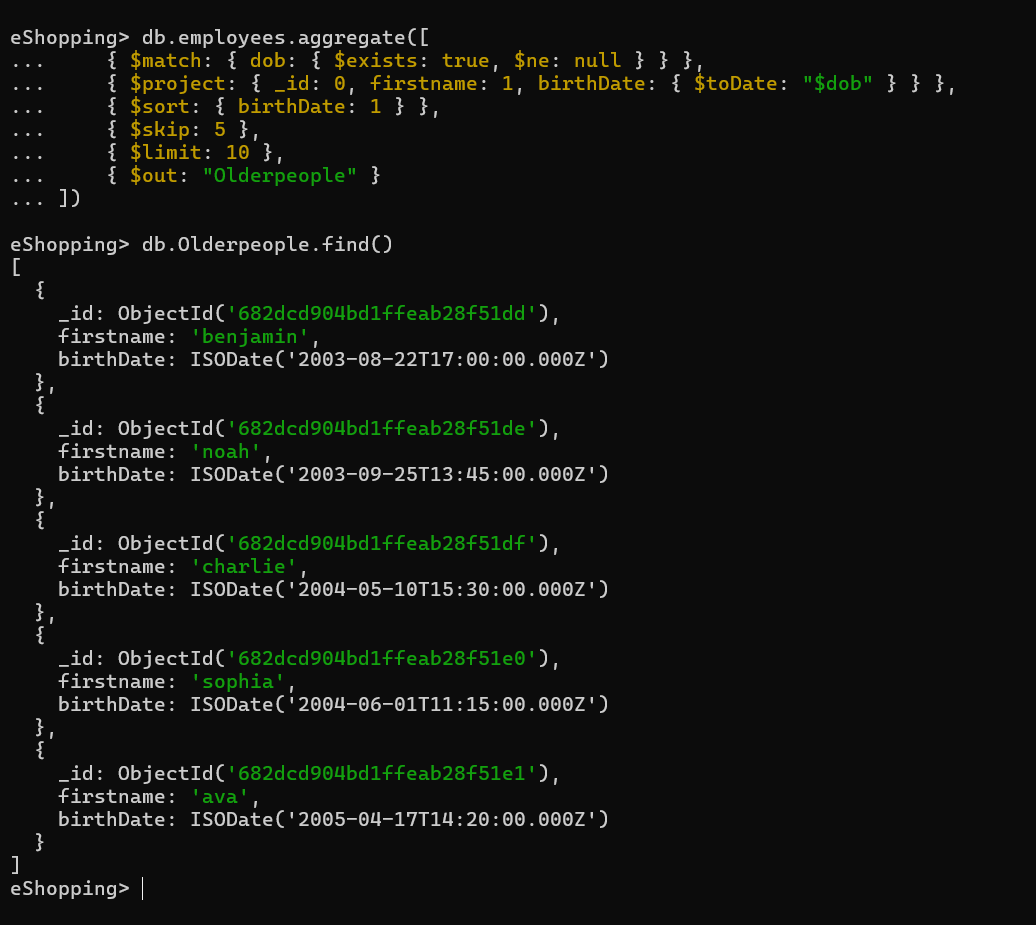

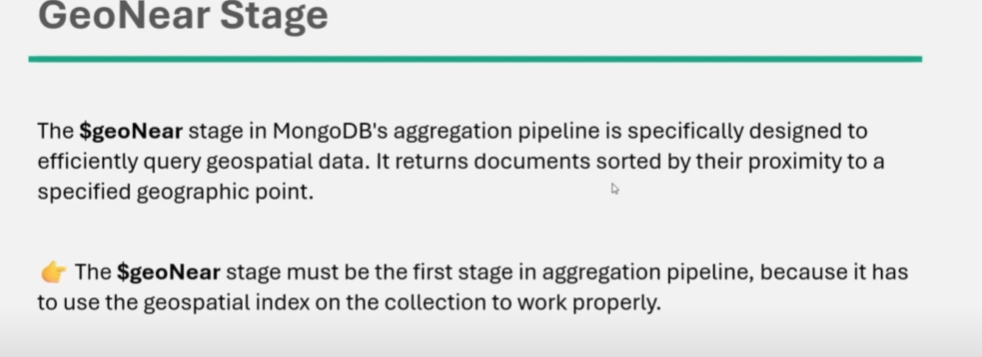



```
db.places.aggregate([
    {
        $geoNear: {
            near: { type: "Point", coordinates: [77.55882, 13.08766] },
            distanceField: "distance",
            maxDistance: 390
        }
    }
])
```



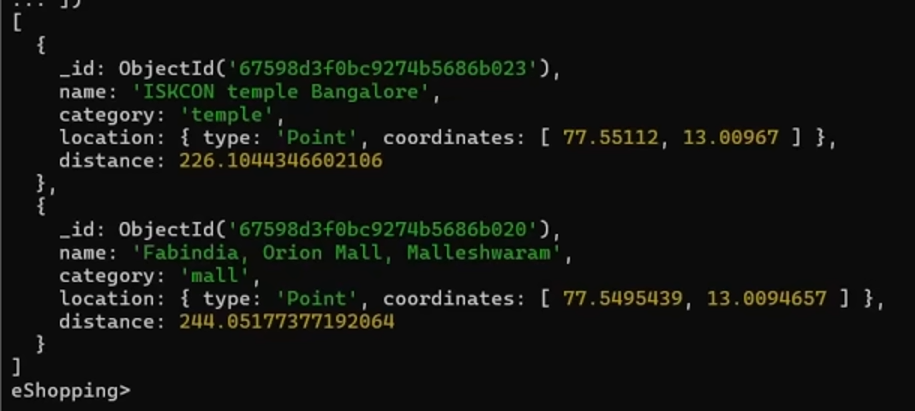

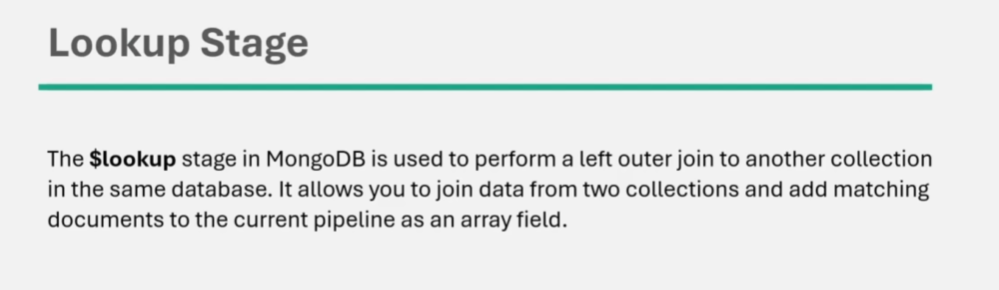



```
db.users.insertMany([
  { _id: 1, name: 'Alice', email: 'alice@gmail.com' },
  { _id: 2, name: 'Bob', email: 'bob@example.com' }
]);
```





```
db.products.insertMany([
  { _id: 'P001', name: 'Laptop', price: 1200 },
  { _id: 'P002', name: 'Mouse', price: 20 },
  { _id: 'P003', name: 'Keyboard', price: 30 }
]);
```





```
db.orders.insertMany([
  { _id: 101, user_id: 1, order_date: '2024-06-17', product_id: 'P001' },
  { _id: 102, user_id: 1, order_date: '2024-06-18', product_id: 'P002' },
  { _id: 103, user_id: 2, order_date: '2024-06-18', product_id: 'P003' }
]);
```





```
db.users.aggregate([
  {
    $lookup: {
      from: 'orders',
      localField: '_id',
      foreignField: 'user_id',
      as: 'user_orders'
    }
  }
])
```



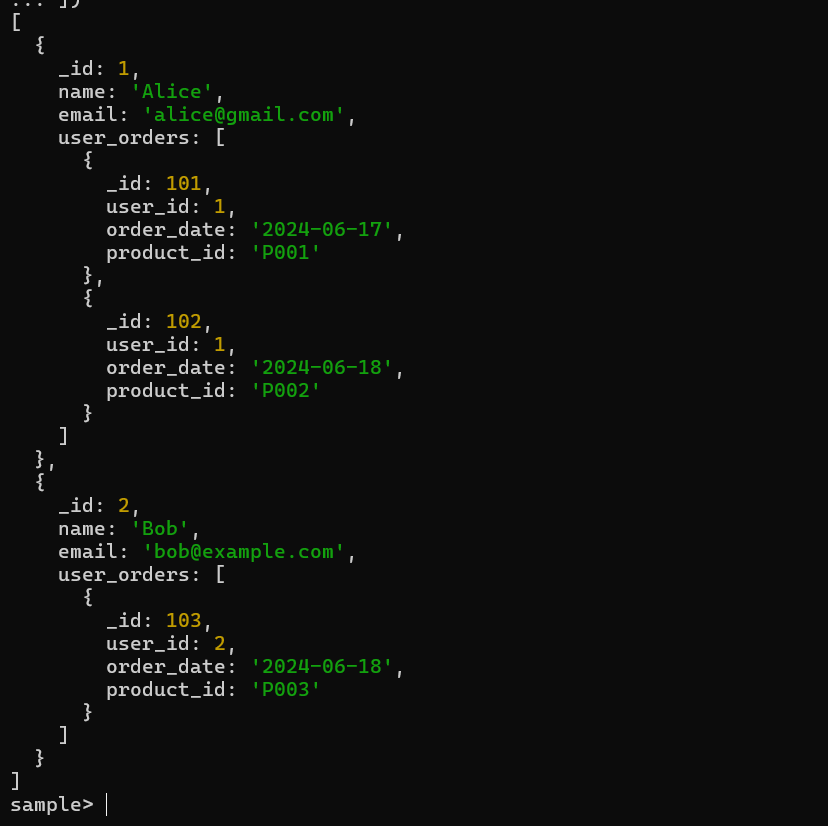



```
db.users.aggregate([
  {
    $lookup: {
      from: 'orders',
      localField: '_id',
      foreignField: 'user_id',
      as: 'user_orders'
    }
  },
  {
    $unwind: '$user_orders'
  },
  {
    $lookup: {
      from: 'products',
      localField: 'user_orders.product_id',
      foreignField: '_id',
      as: 'product_details'
    }
  }
])
```



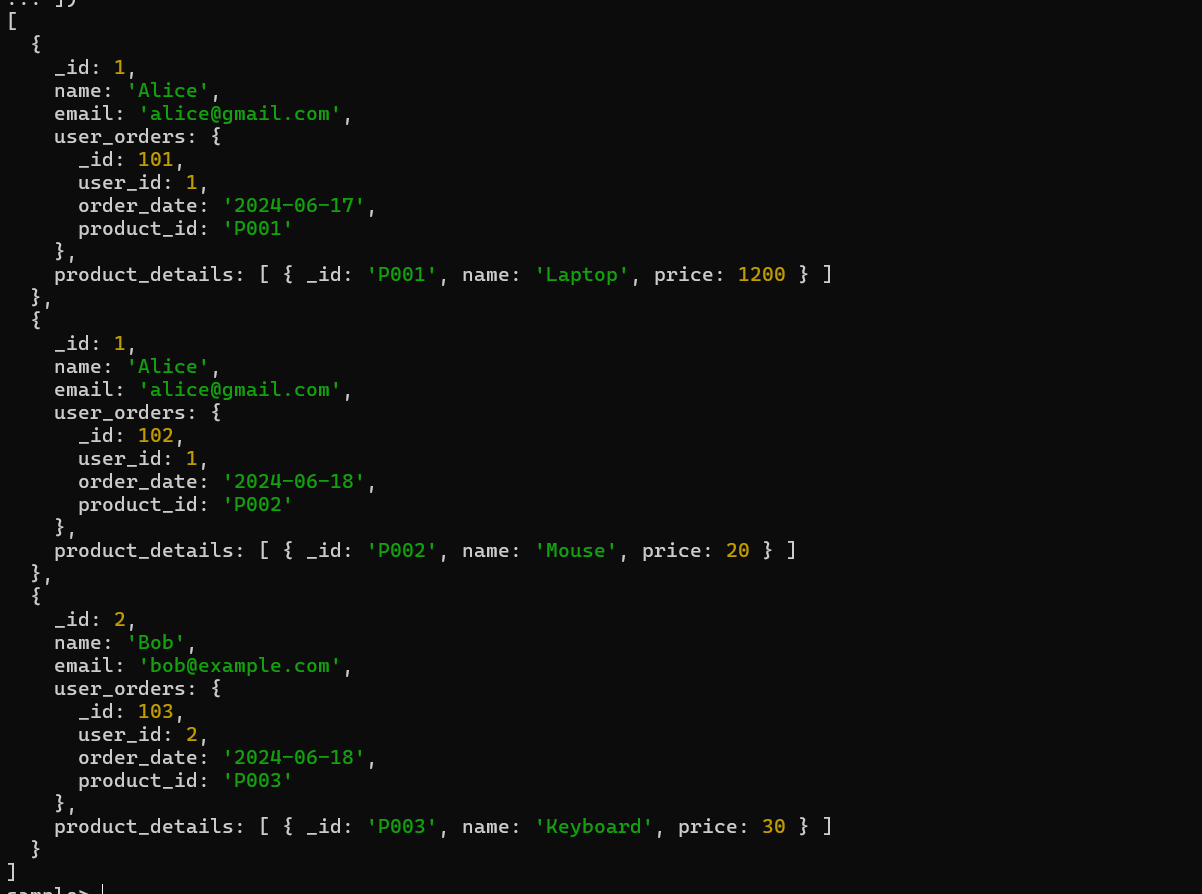



```
db.users.aggregate([
  {
    $lookup: {
      from: 'orders',
      localField: '_id',
      foreignField: 'user_id',
      as: 'user_orders'
    }
  },
  {
    $unwind: '$user_orders'
  },
  {
    $lookup: {
      from: 'products',
      localField: 'user_orders.product_id',
      foreignField: '_id',
      as: 'product_details'
    }
  },
  {
    $unwind: '$product_details'  // storing products_details in documents
  }
])
```



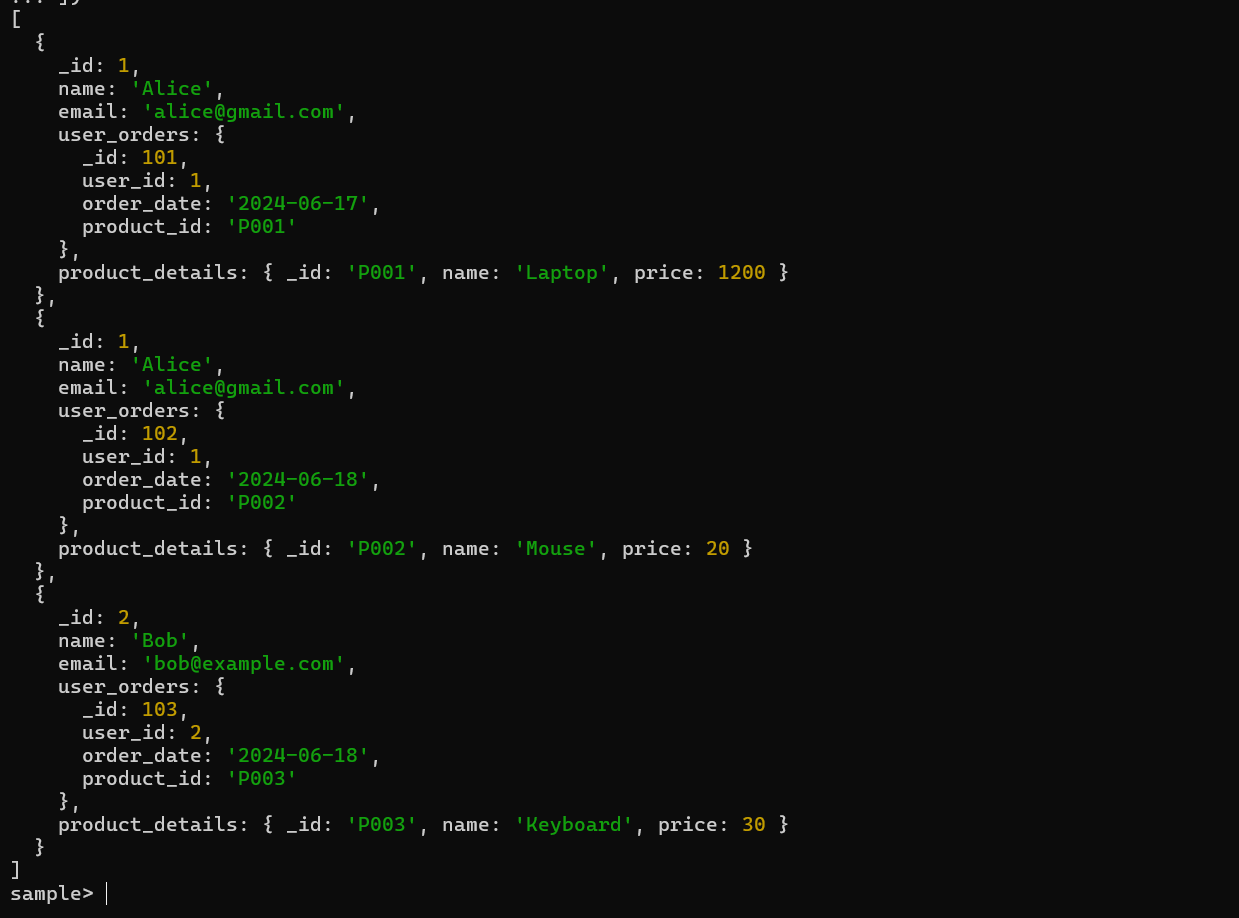



```
db.users.aggregate([
  {
    $lookup: {
      from: 'orders',
      localField: '_id',
      foreignField: 'user_id',
      as: 'user_orders'
    }
  },
  {
    $unwind: '$user_orders'
  },
  {
    $lookup: {
      from: 'products',
      localField: 'user_orders.product_id',
      foreignField: '_id',
      as: 'product_details'
    }
  },
  {
    $unwind: '$product_details'
  },
  {
    $project: {
      _id: 0,
      name: 1,
      email: 1,
      order_id: '$user_orders._id',
      order_date: '$user_orders.order_date',
      product_name: '$product_details.name',
      product_price: '$product_details.price'
    }
  }
])
```



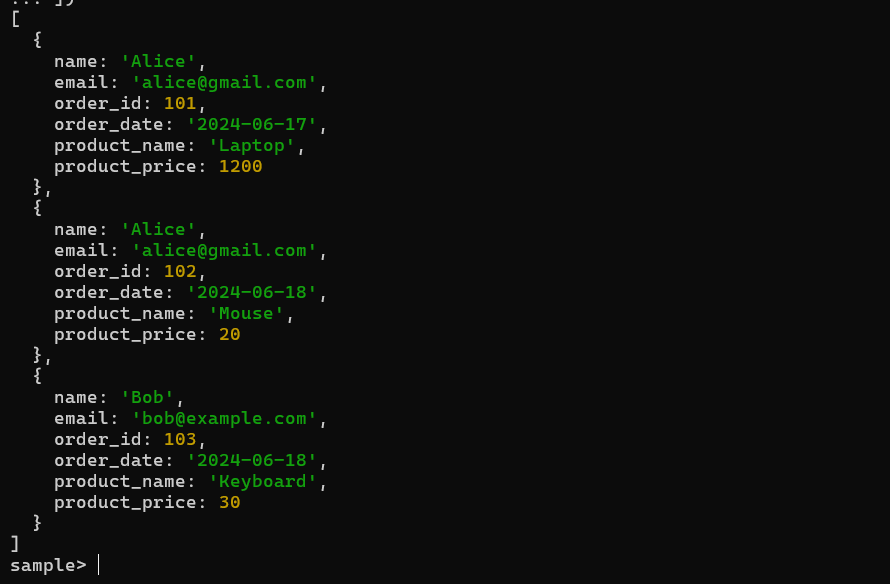

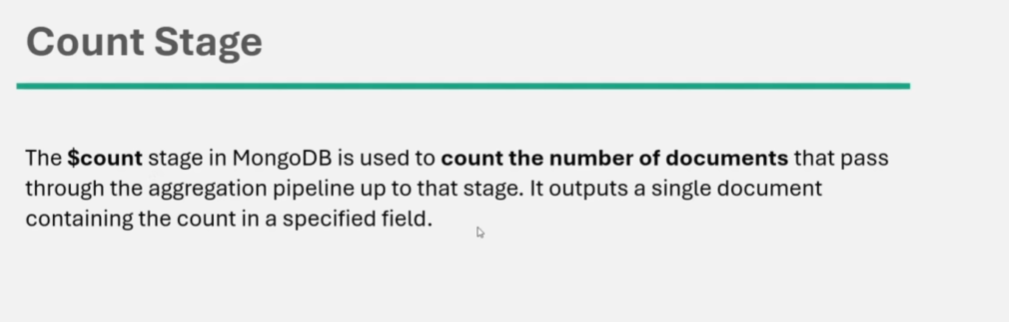

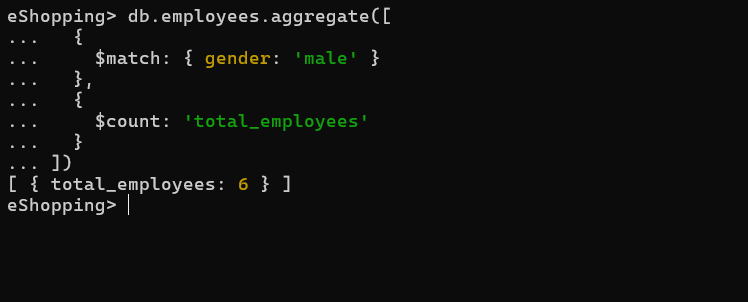

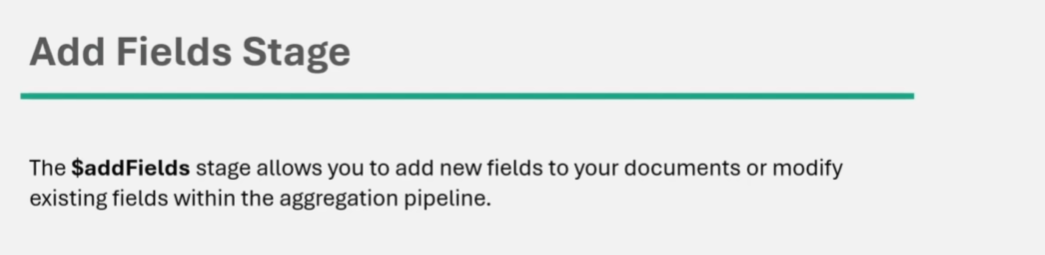



```
db.students.insertMany([
  { name: 'Alice', score: 85, total: 150 },
  { name: 'Bob', score: 72, total: 200 }
])
```





```
db.students.aggregate([
  {
    $addFields: { status: 'active' }
  }
])
```



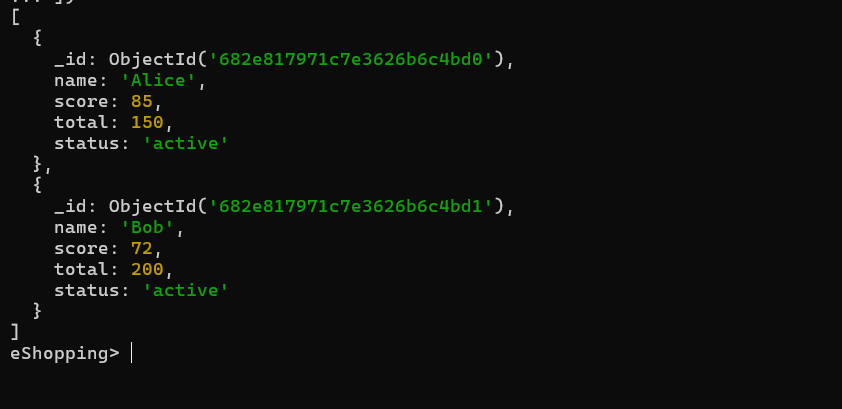



```
db.students.aggregate([
  {
    $addFields: {
      percentage: {
        $multiply: [
          { $divide: ['$score', '$total'] },
          100
        ]
      }
    }
  }
])
```



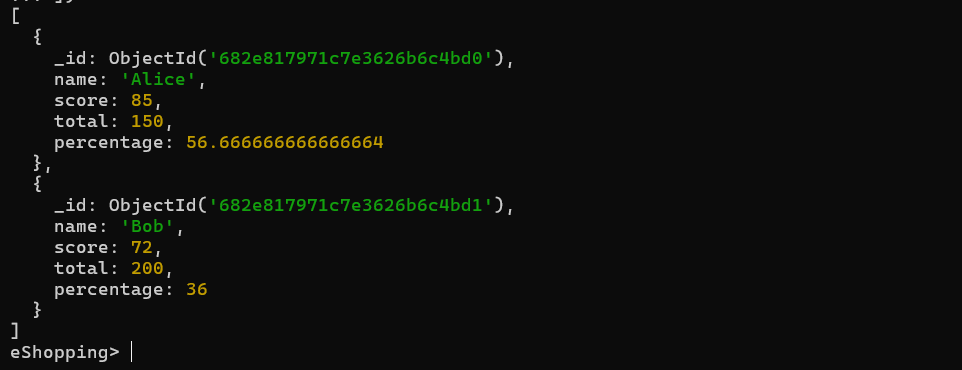

# **Working with Number Type**

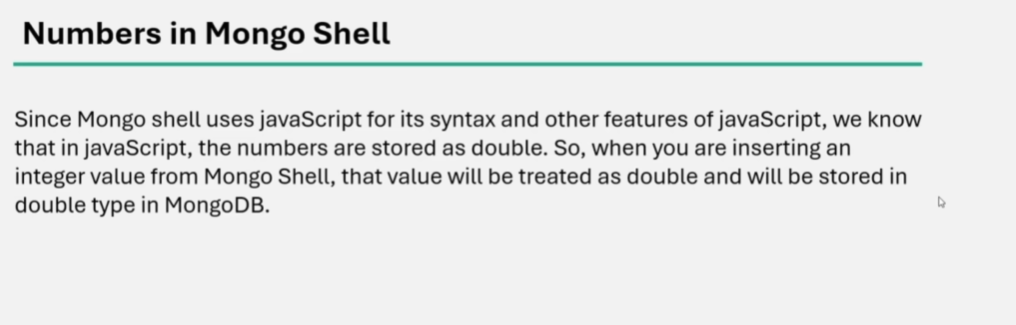

# **by default it is treated as double datatype**

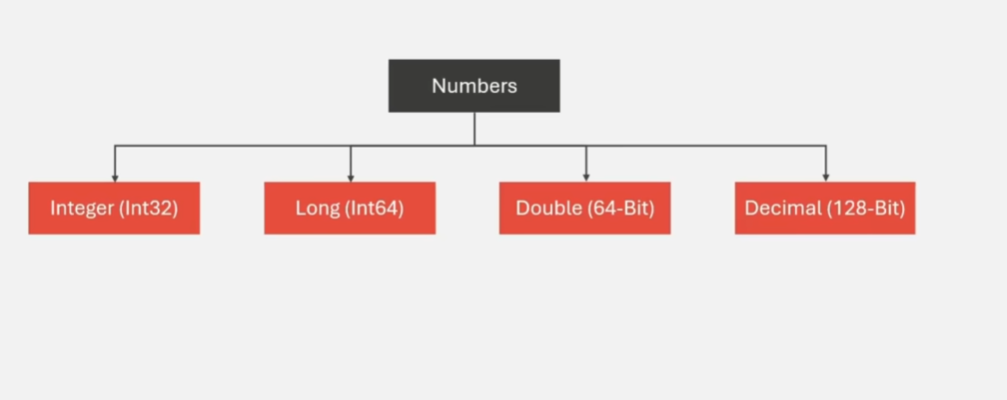

# **Working with Integer Type**

# **Int**

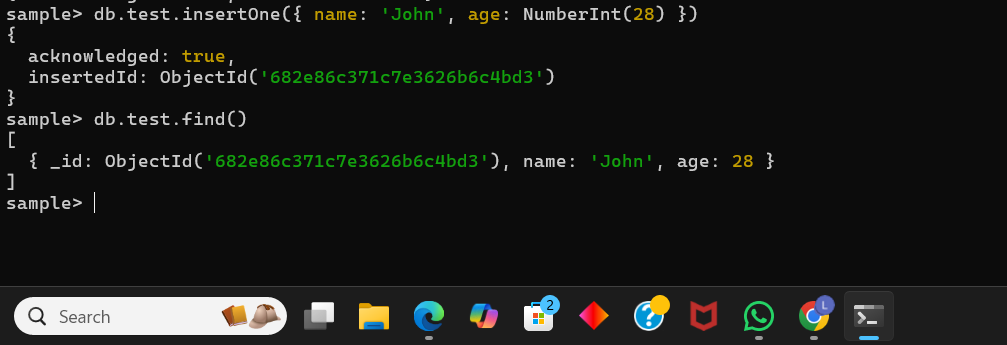

# **Long**

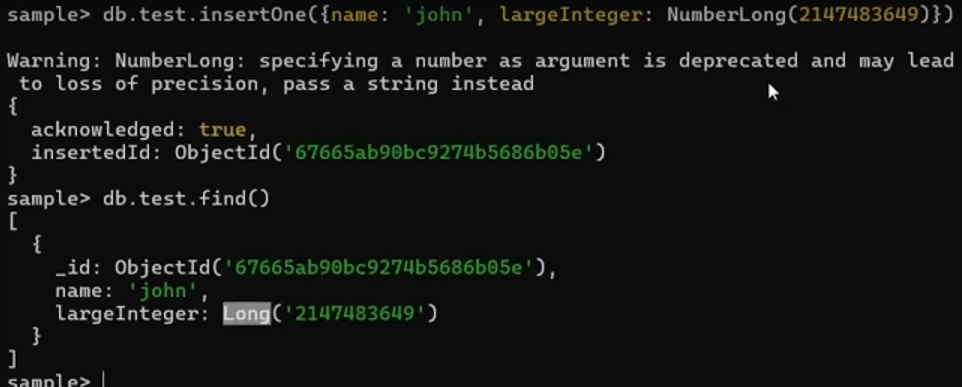

# **note:it is treated as double,to resolve the problem we have to pass the number in ""**

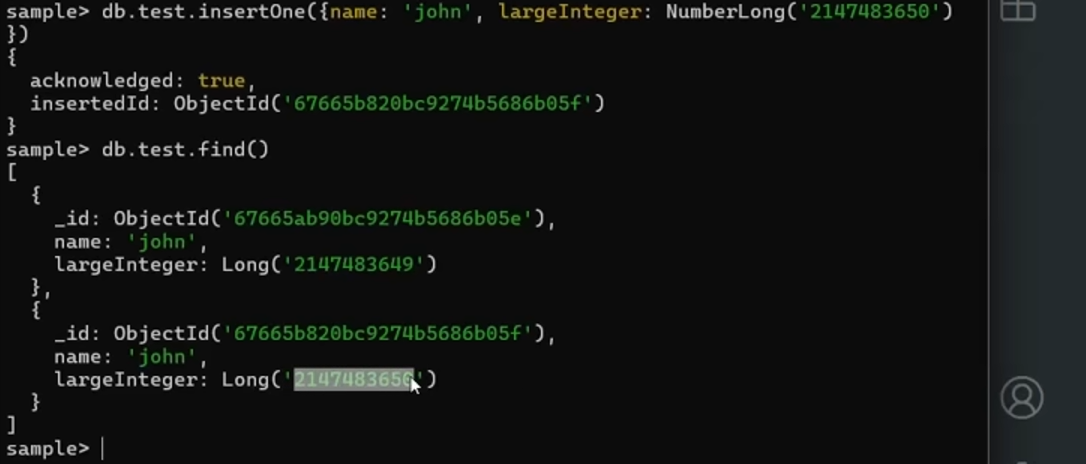

# **Math Operation:**

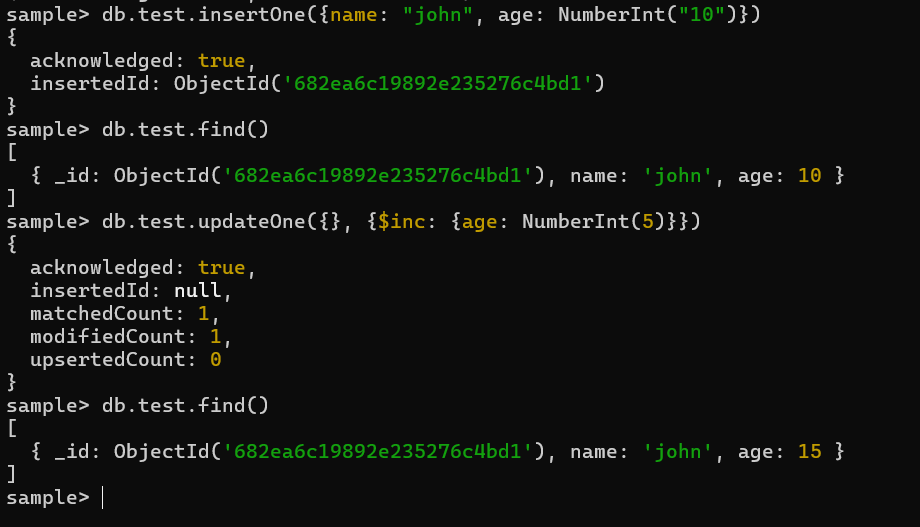